# Test the custom video dataset class

Using a small subset of the class

### Torch setup

In [1]:
import torch
from torch import nn

print("Using PyTorch version:", torch.__version__)

Using PyTorch version: 2.7.1+cu126


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


### Explore data

In [3]:
import os

data_path = "../data/"
split_path = data_path + "splits/asl100.json"
raw_path = data_path + "WLASL2000/"
print(f"split path exists: {os.path.exists(split_path)}\n")
print(f"raw videos path exists: {os.path.exists(raw_path)}\n")

split path exists: True

raw videos path exists: True



In [4]:
from video_dataset import VideoDataset
# prep_train, test and val have already been run
instances_path = './preprocessed_labels/asl100/train_instances.json'
classes_path = './preprocessed_labels/asl100/train_classes.json'
train_dataset = VideoDataset(raw_path, 'train', instances_path, classes_path)

print(f"Number of training samples: {len(train_dataset)}")


Number of training samples: 1442


Label: 0	book
Random frame index: 10
Frame shape: torch.Size([3, 240, 119])


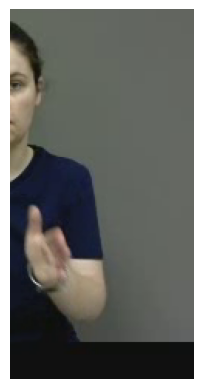

In [6]:
import cv2 
import random
import matplotlib.pyplot as plt

first_item = train_dataset[0]
frames = first_item['frames']
label_num = first_item['label_num']
classes_path = './wlasl_class_list.txt'
with open(classes_path, 'r') as f:
  class_list = f.read().splitlines()
print(f"Label: {class_list[label_num]}")
rand_num = random.randint(0, len(frames) - 1)
print(f"Random frame index: {rand_num}")
frame = frames[rand_num]
print(f"Frame shape: {frame.shape}")
#convert to numpy array
np_frame = frame.permute(1, 2, 0).cpu().numpy()
plt.imshow(np_frame)
plt.axis('off')
plt.show()


Random frame index: 45
Frame shape: torch.Size([3, 240, 119])


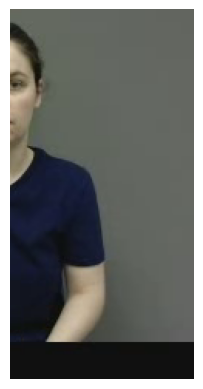

In [9]:
rand_num = random.randint(0, len(frames) - 1)
print(f"Random frame index: {rand_num}")
frame = frames[rand_num]
print(f"Frame shape: {frame.shape}")
#convert to numpy array
np_frame = frame.permute(1, 2, 0).cpu().numpy()
plt.imshow(np_frame)
plt.axis('off')
plt.show()

### There seem to be some issues with cropping

In [ ]:
rand_vid = random.randint(0, len(train_dataset) - 1)
print(f"Random video index: {rand_vid}")
rand_item = train_dataset[rand_vid]
frames = rand_item['frames']
label_num = rand_item['label_num']
print(f"Label: {class_list[label_num]}")
print(f"Number of frames: {len(frames)}")
rand_frame = random.randint(0, len(frames) - 1)
print(f"Random frame index: {rand_frame}")
frame = frames[rand_frame]
print(f"Frame shape: {frame.shape}")
#convert to numpy array
np_frame = frame.permute(1, 2, 0).cpu().numpy()
plt.imshow(np_frame)
plt.axis('off')
plt.show()